In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('uber-raw-data-janjune-15_sample.csv')

In [5]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [6]:
df.shape

(100000, 4)

In [8]:
df.index

RangeIndex(start=0, stop=100000, step=1)

In [9]:
df.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Dispatching_base_num  100000 non-null  object
 1   Pickup_date           100000 non-null  object
 2   Affiliated_base_num   98882 non-null   object
 3   locationID            100000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [12]:
df.describe()

,locationID
count,100000.000000
mean,151.922810
std,71.560596
min,2.000000
25%,92.000000
50%,158.000000
75%,230.000000
max,265.000000


In [13]:
df.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1118
locationID                 0
dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.duplicated().sum()

54

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Dispatching_base_num  99946 non-null  object
 1   Pickup_date           99946 non-null  object
 2   Affiliated_base_num   98830 non-null  object
 3   locationID            99946 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


In [39]:
df['Pickup_date']=pd.to_datetime(df['Pickup_date'])

In [20]:
type(df['Pickup_date'])

pandas.core.series.Series

In [21]:
df.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [22]:
df.head(10)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
5,B02617,2015-05-03 19:42:00,B02617,87
6,B02682,2015-01-14 20:21:50,B02764,125
7,B02764,2015-05-14 15:52:00,B02764,68
8,B02617,2015-03-13 21:18:00,B02617,163
9,B02764,2015-06-13 22:12:00,B02682,235


In [49]:
df['month']=df['Pickup_date'].dt.month_name()
df['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 100000, dtype: object

<Axes: xlabel='month'>

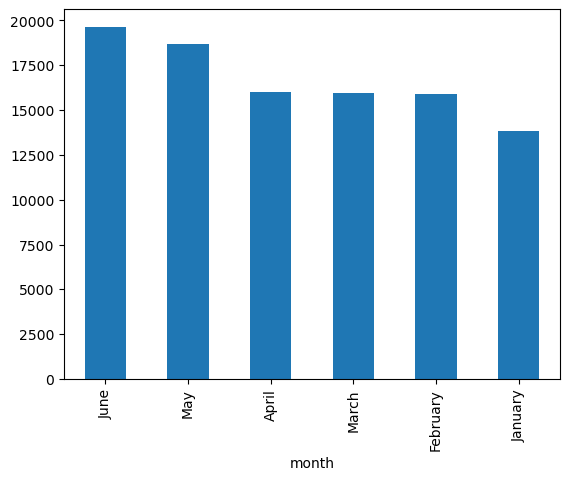

In [41]:
df['month']=df['Pickup_date'].dt.month_name().value_counts().plot(kind='bar')

In [56]:
df['weekday']=df['Pickup_date'].dt.day_name()
df['hour']=df['Pickup_date'].dt.hour
df['minute']=df['Pickup_date'].dt.minute

In [50]:
pivot=pd.crosstab(index=df['month'],columns=df['weekday'])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2366,1834,2512,2056,2826,1880,2521
February,2656,1970,2551,2187,2397,2129,2013
January,2508,1353,2745,1651,2378,1444,1741
June,2794,2852,3037,2488,2770,3191,2504
March,2467,2117,2524,2380,2093,2390,2008
May,3263,1865,3521,2946,2628,2115,2329


<Axes: xlabel='month'>

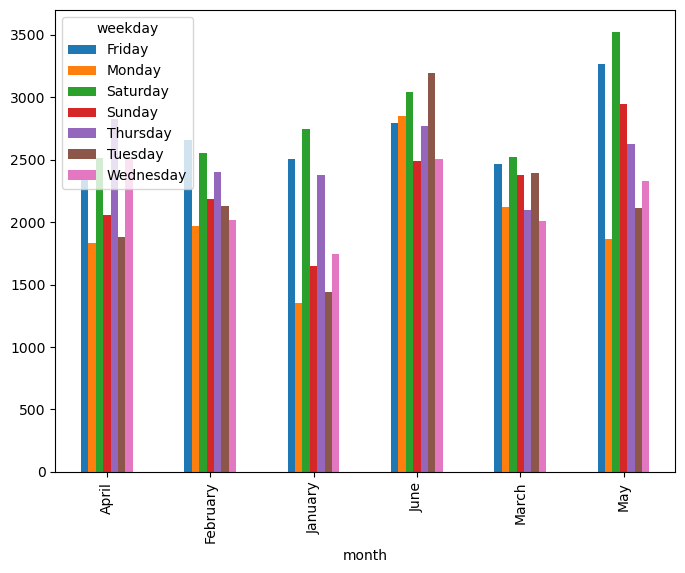

In [48]:
pivot.plot(kind='bar',figsize=(8,6))

In [52]:
summary=df.groupby(['weekday','hour'],as_index=False).size()

<Axes: xlabel='hour', ylabel='size'>

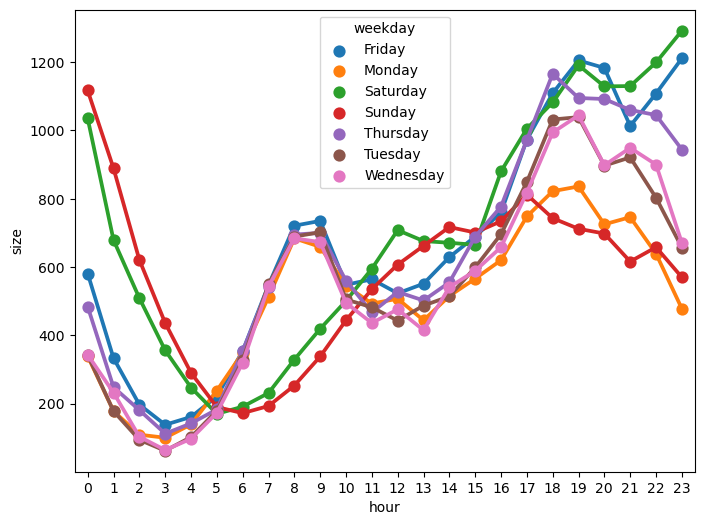

In [58]:
plt.figure(figsize=(8,6))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)